In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Wash-Trading-Case-Study-for-ERC20-Token-Group-1/data/
data=pd.read_excel("NEAR_token_transaction_data.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Wash-Trading-Case-Study-for-ERC20-Token-Group-1/data


# Data Exploration


Data Exploration

In [ ]:
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
19831,0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...,20171628,1719353855,2024-06-25 22:17:35,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xb7e004e47c6d43243ffd1cc44f329d7b3d4bd9ff,80.869797,0x415565b0
19832,0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...,20171862,1719356675,2024-06-25 23:04:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,81.711825,-
19833,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,0x28104d4f703ee5b5011cefe106f54efd56f33f95,1198.366157,Swap Compact
19834,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,706.115108,Swap Compact
19835,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,492.251048,Swap Compact


In [ ]:
data.shape

(19836, 8)

In [ ]:
data.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [ ]:
data.dtypes

,0
Transaction Hash,object
Blockno,int64
UnixTimestamp,int64
DateTime (UTC),datetime64[ns]
From,object
To,object
Quantity,float64
Method,object


In [ ]:
data.describe()

,Blockno,UnixTimestamp,DateTime (UTC),Quantity
count,1.983600e+04,1.983600e+04,19836,19836.000000
mean,1.968441e+07,1.713463e+09,2024-04-18 17:49:02.953417984,377.944387
min,1.890902e+07,1.704069e+09,2024-01-01 00:25:35,0.000000
25%,1.946597e+07,1.710817e+09,2024-03-19 02:58:35,3.213580
50%,1.973666e+07,1.714100e+09,2024-04-26 02:48:23,72.444861
75%,1.993754e+07,1.716527e+09,2024-05-24 05:06:35,293.678666
max,2.017186e+07,1.719357e+09,2024-06-25 23:04:35,750000.000000
std,3.220605e+05,3.898956e+06,NaN,8007.345063


In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
Transaction Hash,0
Blockno,0
UnixTimestamp,0
DateTime (UTC),0
From,0
To,0
Quantity,0
Method,0


In [ ]:
data['Quantity'].unique()

array([3.65938370e+01, 1.04984275e+02, 7.90345859e-02, ...,
       8.17118253e+01, 7.06115108e+02, 4.92251048e+02])

In [ ]:
data['Quantity'].value_counts()

,count
Quantity,
1.000000,480
500.000000,293
300.000000,130
1000.000000,116
800.000000,88
...,...
1394.697664,1
325.422727,1
281.392665,1


In [ ]:
data['Method'].unique()

array(['Sell To Uniswap', '0x415565b0', 'Transfer From',
       'Finalise Near To Eth Transfer', 'Process Route', '-', 'Swap',
       'Transfer', 'Multiplex Multi Hop Sell Token For Token',
       'Transfer To Near', 'Execute Meta Transaction V2',
       'Fill Quote Token To Eth', 'Fill Quote Token To Token',
       'Mooo Z1089603480', 'Simple Swap', 'Relay1Gs Wnfs IQR Oy',
       'Execute', 'Insert Cool Text Z8301034834361545146', '0x00000000',
       'Exec', 'Unoswap', 'Bridge', 'Swap On Uniswap V2Fork',
       'Exec Transaction', 'Mix Swap', 'Remove Liquidity ETH With Permit',
       'Swap Tokens Generic', 'Unwind Pairs', 'Withdraw',
       'Remove Liquidity ETH', 'Buy On Uniswap V2Fork', 'Sell Shares',
       'Fill Quote Eth To Token', 'External Swap',
       'Swap Exact ETH For Tokens', 'Swap Exact Tokens For Tokens',
       'Eth Unoswap', 'Multi Swap', 'Unoswap2', 'Outbound Transfer',
       'Call', 'Swap Simple Mode', 'Execute Transaction', 'Settle Orders',
       'Permit And Ca

In [ ]:
data['Method'].value_counts()

,count
Method,
Swap,9432
0x415565b0,3281
-,2563
Execute,1030
Sell To Uniswap,760
...,...
Withdraw,1
Buy On Uniswap V2Fork,1
Fill Order,1


# Exploratory Data Analysis


In [ ]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

In [ ]:
sample_data = data.sample(n=1000, random_state=42)

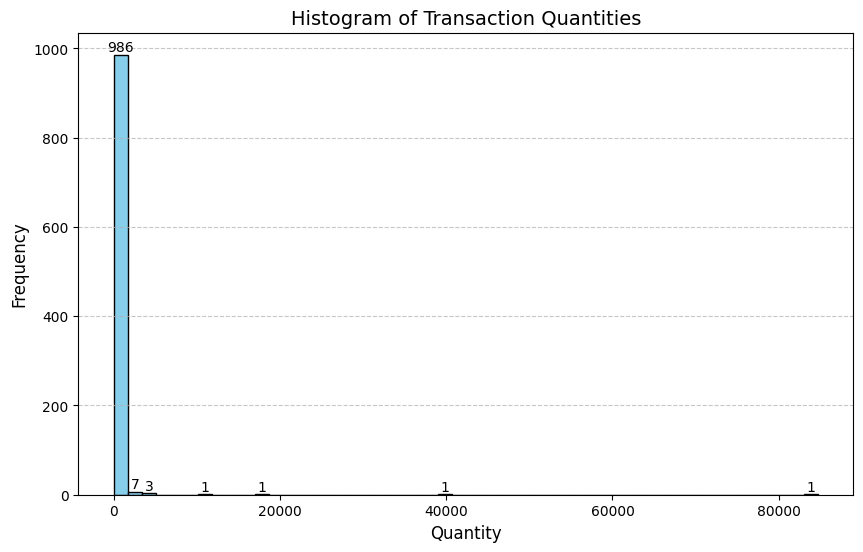

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Histogram of Transaction Quantities', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
counts, bins, bars = plt.hist(sample_data['Quantity'], bins=50, color='skyblue', edgecolor='black')
for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, int(count),
                 ha='center', va='bottom', fontsize=10)
plt.show()

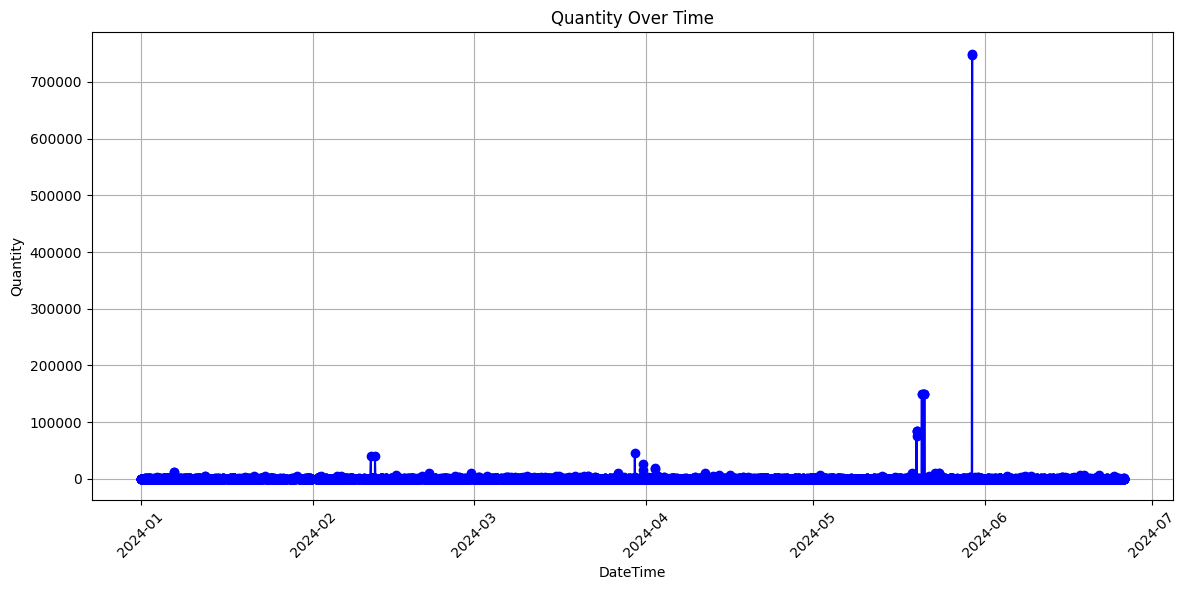

In [ ]:
datetime = pd.to_datetime(data['DateTime (UTC)'])
quantity= pd.to_numeric(data['Quantity'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.plot(datetime, quantity, marker='o', linestyle='-', color='b')
plt.title('Quantity Over Time')
plt.xlabel('DateTime')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

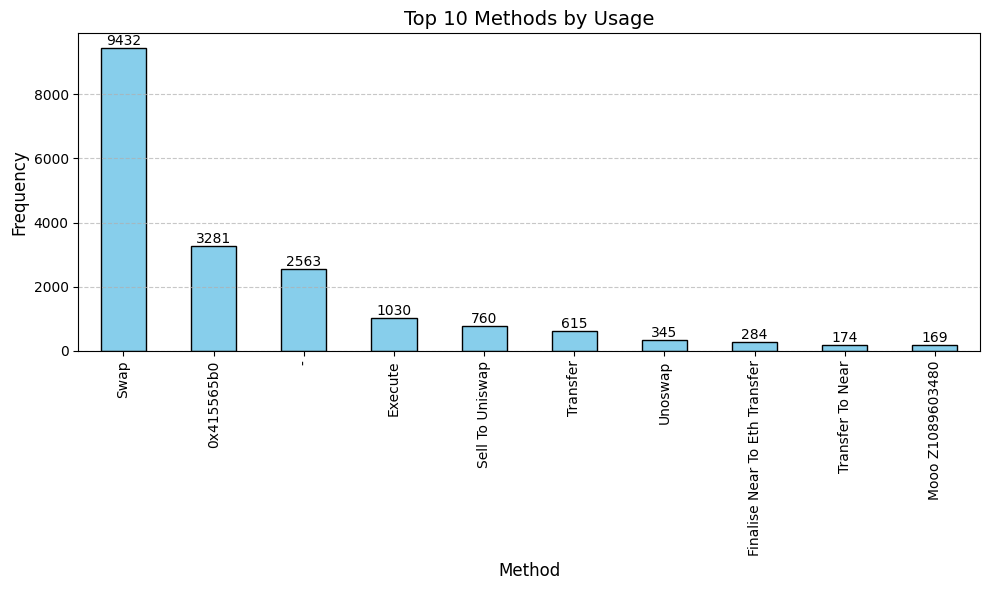

In [ ]:
top_methods=data['Method'].value_counts().head(10)
fd=data[data['Method'].isin(top_methods.index)]
plt.figure(figsize=(10,6))
top_methods.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Methods by Usage', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i, count in enumerate(top_methods):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

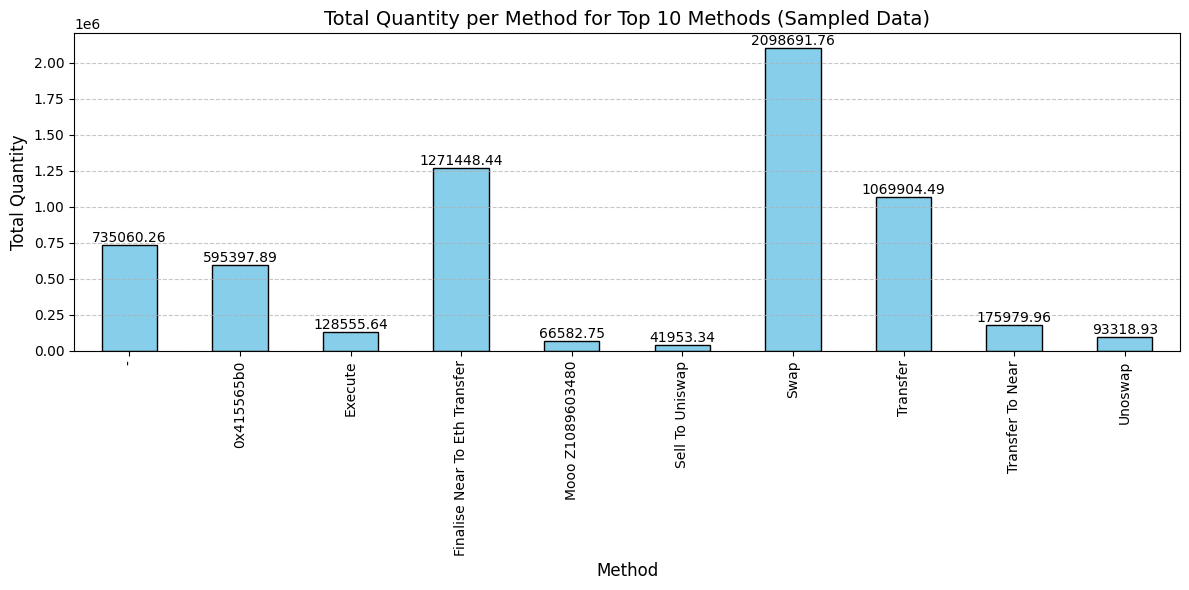

In [ ]:
top_methods = data['Method'].value_counts().head(10).index
filtered_data = data[data['Method'].isin(top_methods)]
quantity_per_method = filtered_data.groupby('Method')['Quantity'].sum()
plt.figure(figsize=(12, 6))
quantity_per_method.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Quantity per Method for Top 10 Methods (Sampled Data)', fontsize=14)
plt.xlabel('Method', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
for i, quantity in enumerate(quantity_per_method):
    plt.text(i, quantity, f'{quantity:.2f}', ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

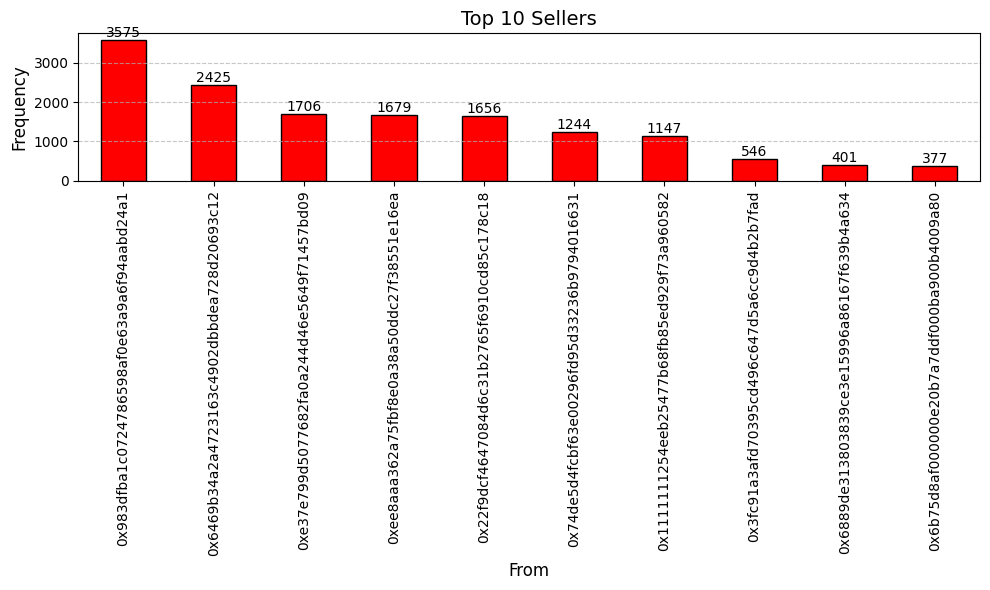

In [ ]:
top_methods=data['From'].value_counts().head(10)
fd=data[data['From'].isin(top_methods.index)]
plt.figure(figsize=(10,6))
top_methods.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Sellers', fontsize=14)
plt.xlabel('From', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i, count in enumerate(top_methods):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

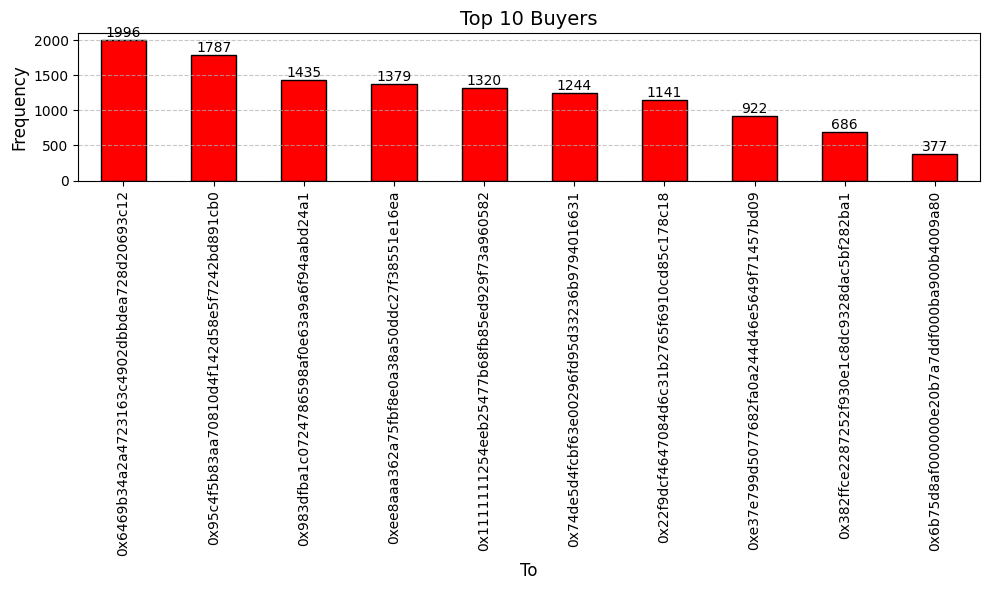

In [ ]:
top_methods=data['To'].value_counts().head(10)
fd=data[data['To'].isin(top_methods.index)]
plt.figure(figsize=(10,6))
top_methods.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Buyers', fontsize=14)
plt.xlabel('To', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i, count in enumerate(top_methods):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Data Cleaning

In [ ]:
missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
missing_data['Percentage'] = (missing_data['Missing Values'] / len(data)) * 100
print("Missing Values in Each Column:")
print(missing_data)

Missing Values in Each Column:
             Column  Missing Values  Percentage
0  Transaction Hash               0         0.0
1           Blockno               0         0.0
2     UnixTimestamp               0         0.0
3    DateTime (UTC)               0         0.0
4              From               0         0.0
5                To               0         0.0
6          Quantity               0         0.0
7            Method               0         0.0


<ipython-input-148-42fb63a80f20>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Missing Values', data=missing_data, palette='viridis')


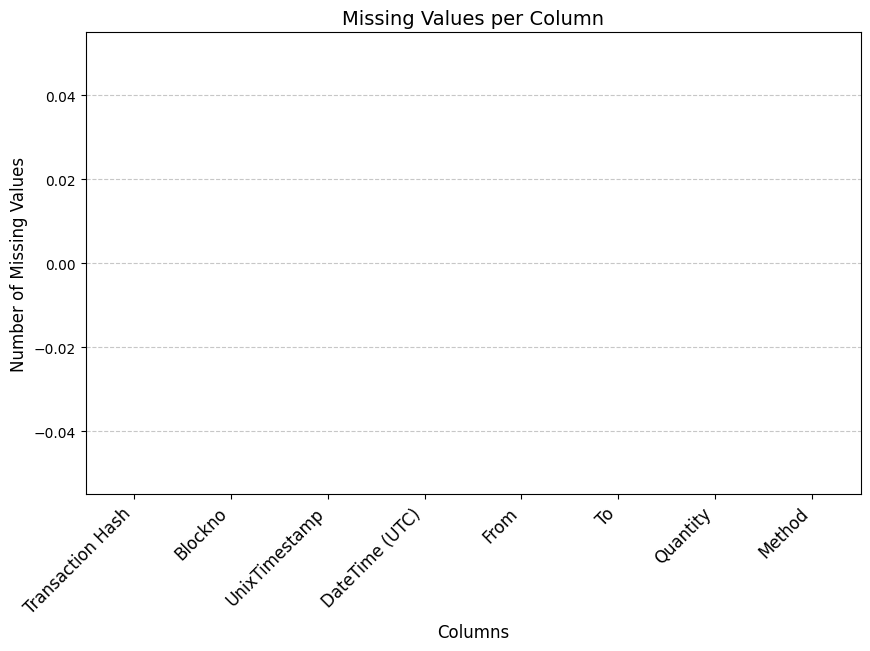

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Values', data=missing_data, palette='viridis')
plt.title('Missing Values per Column', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Thus, there are no missing values

In [ ]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [ ]:
quantity_outliers = detect_outliers_iqr(data['Quantity'].dropna())

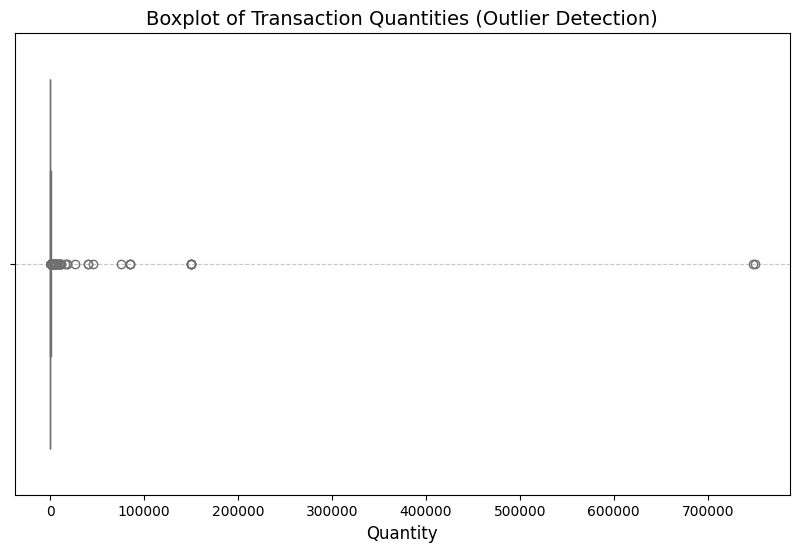

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Quantity', color='skyblue')
plt.title('Boxplot of Transaction Quantities (Outlier Detection)', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(f"Total outliers detected in 'Quantity': {len(quantity_outliers)}")
print(f"Outlier Values:\n{quantity_outliers}")

Total outliers detected in 'Quantity': 1689
Outlier Values:
42        816.500000
48        810.034476
50        810.034476
76        991.532433
77        991.532433
            ...     
19706     758.799883
19707    1720.940369
19712     746.305913
19815     746.300000
19833    1198.366157
Name: Quantity, Length: 1689, dtype: float64


In [ ]:
data_no_outliers = data[~data['Quantity'].isin(quantity_outliers)]

Handling the outliers


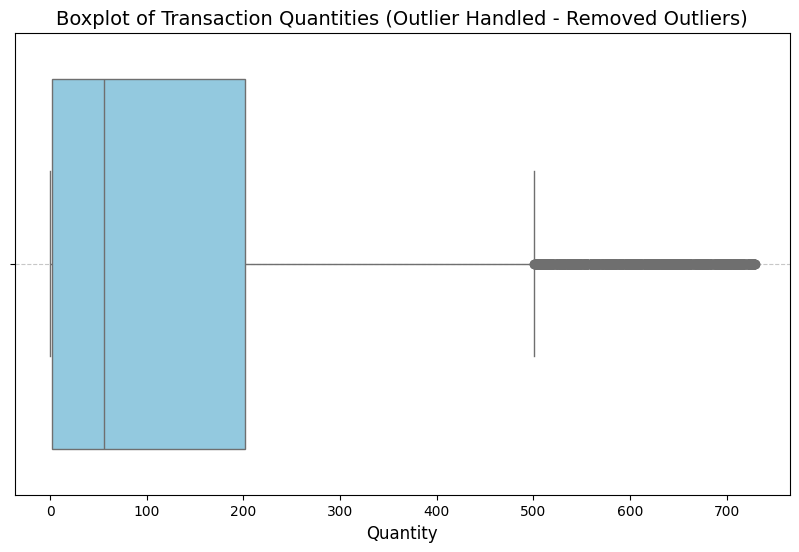

Total outliers removed from 'Quantity': 1689


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers, x='Quantity', color='skyblue')
plt.title('Boxplot of Transaction Quantities (Outlier Handled - Removed Outliers)', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Total outliers removed from 'Quantity': {len(quantity_outliers)}")

# Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
def basic_feature_engineering(df):
    # Create copy to avoid modifying original data
    df_processed = df.copy()

    # 1. Timestamp processing (if timestamp column exists)
    if 'DateTime' in df_processed.columns:
        df_processed['timestamp'] = pd.to_datetime(df_processed['timestamp'])
        df_processed['hour'] = df_processed['timestamp'].dt.hour
        df_processed['day_of_week'] = df_processed['timestamp'].dt.dayofweek

    # 2. Transaction amount features (assuming amount column exists)
    if 'Quantity' in df_processed.columns:  # Check for correct column name: 'Quantity'
        df_processed['quantity_log'] = np.log1p(df_processed['Quantity']) # Use 'Quantity' instead of 'quantity'

    # 3. Scale numerical features
    numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

    return df_processed

# Apply feature engineering
data = basic_feature_engineering(data)

In [ ]:
# Convert 'DateTime (UTC)' to datetime format if it's not already
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])

# Extract year, month, and day as new features
data['Year'] = data['DateTime (UTC)'].dt.year
data['Month'] = data['DateTime (UTC)'].dt.month
data['Day'] = data['DateTime (UTC)'].dt.day

# Display the updated dataframe with new features
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,Month,Day
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,-0.054120,2024,1,1
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0.389716,2024,1,1
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,-1.574657,2024,1,1
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0.389716,2024,1,1
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,-0.570861,2024,1,1


In [ ]:
# Create bins for Quantity
bins = [0, 100, 500, 1000, 5000, np.inf]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
data['Quantity_Binned'] = pd.cut(data['Quantity'], bins=bins, labels=labels)

# Display the updated dataframe with binned quantities
data.tail()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,Month,Day,Quantity_Binned
19831,0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...,1.512858,1.511036,2024-06-25 22:17:35,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xb7e004e47c6d43243ffd1cc44f329d7b3d4bd9ff,-0.037101,0x415565b0,0.279165,2024,6,25,NaN
19832,0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...,1.513585,1.511759,2024-06-25 23:04:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,-0.036996,-,0.283547,2024,6,25,NaN
19833,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,1.513585,1.511759,2024-06-25 23:04:35,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0.102461,Swap Compact,1.428705,2024,6,25,0-100
19834,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,1.513585,1.511759,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,0.040985,Swap Compact,1.202449,2024,6,25,0-100
19835,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,1.513585,1.511759,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0.014276,Swap Compact,1.048212,2024,6,25,0-100


In [ ]:
# Sort by DateTime to ensure proper difference calculation
data.sort_values(by='DateTime (UTC)', inplace=True)

# Calculate time difference between transactions in seconds
data['Time_Diff'] = data['DateTime (UTC)'].diff().dt.total_seconds()

# Display the updated dataframe with time differences
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,Month,Day,Quantity_Binned,Time_Diff
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,-0.054120,2024,1,1,NaN,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0.389716,2024,1,1,NaN,636.0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,-1.574657,2024,1,1,NaN,0.0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0.389716,2024,1,1,NaN,0.0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,-0.570861,2024,1,1,NaN,948.0


In [ ]:
# Fill missing values with forward fill method
data.fillna(method='ffill', inplace=True)

# Alternatively, drop rows with missing values
# df.dropna(inplace=True)

<ipython-input-160-2df6fe77b624>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Create lagged features for Quantity
for lag in range(1, 4):  # Create lagged features for 1 to 3 previous periods
    data[f'Quantity_Lag_{lag}'] = data['Quantity'].shift(lag)

# Display the updated dataframe with lagged features
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,Month,Day,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,-0.054120,2024,1,1,NaN,NaN,NaN,NaN,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0.389716,2024,1,1,NaN,636.0,-0.042631,NaN,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,-1.574657,2024,1,1,NaN,0.0,-0.034090,-0.042631,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0.389716,2024,1,1,NaN,0.0,-0.047191,-0.034090,-0.042631
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,-0.570861,2024,1,1,NaN,948.0,-0.034090,-0.047191,-0.034090


In [ ]:
# Calculate rolling mean and standard deviation for Quantity over a window of 5 periods
data['Quantity_Rolling_Mean'] = data['Quantity'].rolling(window=5).mean()
data['Quantity_Rolling_Std'] = data['Quantity'].rolling(window=5).std()

# Display the updated dataframe with rolling statistics
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,Month,Day,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,-0.054120,2024,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0.389716,2024,1,1,NaN,636.0,-0.042631,NaN,NaN,NaN,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,-1.574657,2024,1,1,NaN,0.0,-0.034090,-0.042631,NaN,NaN,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0.389716,2024,1,1,NaN,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,-0.570861,2024,1,1,NaN,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334


In [ ]:
# Calculate Moving Average (MA) and Exponential Moving Average (EMA)
data['MA_10'] = data['Quantity'].rolling(window=10).mean()
data['EMA_10'] = data['Quantity'].ewm(span=10, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data['Quantity'], window=14)

# Display the updated dataframe with technical indicators
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,MA_10,EMA_10,RSI
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,-0.042631,Sell To Uniswap,-0.054120,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.042631,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.034090,0x415565b0,0.389716,2024,...,NaN,636.0,-0.042631,NaN,NaN,NaN,NaN,NaN,-0.041078,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,-0.047191,0x415565b0,-1.574657,2024,...,NaN,0.0,-0.034090,-0.042631,NaN,NaN,NaN,NaN,-0.042189,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,-0.034090,0x415565b0,0.389716,2024,...,NaN,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN,NaN,-0.040717,NaN
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,-0.045921,0x415565b0,-0.570861,2024,...,NaN,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334,NaN,-0.041663,NaN


In [ ]:
# Scale features using MinMaxScaler or StandardScaler
scaler = MinMaxScaler()

# Select features to scale (modify according to your needs)
features_to_scale = ['Quantity', 'MA_10', 'EMA_10', 'RSI']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the scaled features
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Quantity_Binned,Time_Diff,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,MA_10,EMA_10,RSI
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,4.879178e-05,Sell To Uniswap,-0.054120,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000144,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,636.0,-0.042631,NaN,NaN,NaN,NaN,NaN,0.000194,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.053794e-07,0x415565b0,-1.574657,2024,...,NaN,0.0,-0.034090,-0.042631,NaN,NaN,NaN,NaN,0.000158,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,0.0,-0.047191,-0.034090,-0.042631,NaN,NaN,NaN,0.000205,NaN
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.366325e-05,0x415565b0,-0.570861,2024,...,NaN,948.0,-0.034090,-0.047191,-0.034090,-0.040784,0.006334,NaN,0.000175,NaN


In [ ]:
# Identify self-trades
data['Is_Self_Trade'] = data['From'] == data['To']

# Count the number of self-trades per account
self_trade_counts = data[data['Is_Self_Trade']].groupby('From').size().reset_index(name='Self_Trade_Count')

# Merge self-trade counts back to the original dataframe
data = data.merge(self_trade_counts, how='left', left_on='From', right_on='From')
data['Self_Trade_Count'].fillna(0, inplace=True)

# Display the updated dataframe with self-trade counts
data.head()


<ipython-input-165-b26e5ec7b96a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Self_Trade_Count'].fillna(0, inplace=True)


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Quantity_Lag_1,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,MA_10,EMA_10,RSI,Is_Self_Trade,Self_Trade_Count
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,4.879178e-05,Sell To Uniswap,-0.054120,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000144,NaN,False,0.0
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.399790e-04,0x415565b0,0.389716,2024,...,-0.042631,NaN,NaN,NaN,NaN,NaN,0.000194,NaN,False,0.0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.053794e-07,0x415565b0,-1.574657,2024,...,-0.034090,-0.042631,NaN,NaN,NaN,NaN,0.000158,NaN,False,0.0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,1.399790e-04,0x415565b0,0.389716,2024,...,-0.047191,-0.034090,-0.042631,NaN,NaN,NaN,0.000205,NaN,False,0.0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.366325e-05,0x415565b0,-0.570861,2024,...,-0.034090,-0.047191,-0.034090,-0.040784,0.006334,NaN,0.000175,NaN,False,0.0


In [ ]:
# Calculate total quantity traded by each account
total_traded_volume = data.groupby('From')['Quantity'].sum().reset_index(name='Total_Traded_Volume')

# Merge total traded volume back to the original dataframe
data = data.merge(total_traded_volume, how='left', left_on='From', right_on='From')

# Display the updated dataframe with total traded volume
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Quantity_Lag_2,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,MA_10,EMA_10,RSI,Is_Self_Trade,Self_Trade_Count,Total_Traded_Volume
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,4.879178e-05,Sell To Uniswap,-0.054120,2024,...,NaN,NaN,NaN,NaN,NaN,0.000144,NaN,False,0.0,0.274276
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,NaN,NaN,NaN,NaN,0.000194,NaN,False,0.0,0.848043
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.053794e-07,0x415565b0,-1.574657,2024,...,-0.042631,NaN,NaN,NaN,NaN,0.000158,NaN,False,0.0,0.848043
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,1.399790e-04,0x415565b0,0.389716,2024,...,-0.034090,-0.042631,NaN,NaN,NaN,0.000205,NaN,False,0.0,0.412742
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.366325e-05,0x415565b0,-0.570861,2024,...,-0.047191,-0.034090,-0.040784,0.006334,NaN,0.000175,NaN,False,0.0,0.848043


In [ ]:
# Create a function to detect circular trades
def detect_circular_trades(df):
    circular_trades = []
    grouped = df.groupby(['From', 'To'])

    for (from_address, to_address), group in grouped:
        if len(group) > 1:
            circular_trades.append((from_address, to_address))

    return circular_trades

# Apply the circular trade detection function
circular_trade_pairs = detect_circular_trades(data)

# Mark circular trades in the dataframe
for from_addr, to_addr in circular_trade_pairs:
    data.loc[(data['From'] == from_addr) & (data['To'] == to_addr), 'Is_Circular_Trade'] = True

data['Is_Circular_Trade'].fillna(False, inplace=True)

# Display the updated dataframe with circular trade indicator
data.head()


<ipython-input-167-40d8d6a0a771>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Is_Circular_Trade'].fillna(False, inplace=True)
<ipython-input-167-40d8d6a0a771>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Is_Circular_Trade'].fillna(False, inplace=True)


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Quantity_Lag_3,Quantity_Rolling_Mean,Quantity_Rolling_Std,MA_10,EMA_10,RSI,Is_Self_Trade,Self_Trade_Count,Total_Traded_Volume,Is_Circular_Trade
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,4.879178e-05,Sell To Uniswap,-0.054120,2024,...,NaN,NaN,NaN,NaN,0.000144,NaN,False,0.0,0.274276,True
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,NaN,NaN,NaN,0.000194,NaN,False,0.0,0.848043,True
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.053794e-07,0x415565b0,-1.574657,2024,...,NaN,NaN,NaN,NaN,0.000158,NaN,False,0.0,0.848043,True
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,1.399790e-04,0x415565b0,0.389716,2024,...,-0.042631,NaN,NaN,NaN,0.000205,NaN,False,0.0,0.412742,False
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.366325e-05,0x415565b0,-0.570861,2024,...,-0.034090,-0.040784,0.006334,NaN,0.000175,NaN,False,0.0,0.848043,True


In [ ]:
# Calculate trade frequency per account
trade_frequency = data.groupby('From')['Transaction Hash'].count().reset_index(name='Trade_Frequency')

# Merge trade frequency back to the original dataframe
data = data.merge(trade_frequency, how='left', left_on='From', right_on='From')

# Display the updated dataframe with trade frequency
data.head()


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Quantity_Rolling_Mean,Quantity_Rolling_Std,MA_10,EMA_10,RSI,Is_Self_Trade,Self_Trade_Count,Total_Traded_Volume,Is_Circular_Trade,Trade_Frequency
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,4.879178e-05,Sell To Uniswap,-0.054120,2024,...,NaN,NaN,NaN,0.000144,NaN,False,0.0,0.274276,True,2425
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,NaN,NaN,0.000194,NaN,False,0.0,0.848043,True,3575
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.053794e-07,0x415565b0,-1.574657,2024,...,NaN,NaN,NaN,0.000158,NaN,False,0.0,0.848043,True,3575
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,NaN,NaN,0.000205,NaN,False,0.0,0.412742,False,1656
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.366325e-05,0x415565b0,-0.570861,2024,...,-0.040784,0.006334,NaN,0.000175,NaN,False,0.0,0.848043,True,3575


In [ ]:
# Create a function to identify common funders
def identify_common_funders(df):
    funder_map = {}

    for _, row in df.iterrows():
        if row['Quantity'] > 0:  # Only consider positive quantities for funding transactions
            funder_map.setdefault(row['To'], []).append(row['From'])

    return funder_map

common_funders = identify_common_funders(data)

# Convert common funders dictionary to DataFrame for analysis
funder_df = pd.DataFrame([(k, v) for k, v in common_funders.items()], columns=['Account', 'Funded_By'])

# Display common funders DataFrame
funder_df.head()


,Account,Funded_By
0,0x776a0725094cbf984e31b43d17e8aaec3c88294a,"[0x6469b34a2a4723163c4902dbbdea728d20693c12, 0..."
1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,"[0x983dfba1c0724786598af0e63a9a6f94aabd24a1, 0..."
2,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,"[0x983dfba1c0724786598af0e63a9a6f94aabd24a1, 0..."
3,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,"[0x22f9dcf4647084d6c31b2765f6910cd85c178c18, 0..."
4,0x323d3416ed0375f57cf97739ea85134a600fbf7a,[0x22f9dcf4647084d6c31b2765f6910cd85c178c18]


In [ ]:
# Assuming df is your DataFrame containing the ERC20 transaction data
data['DateTime'] = pd.to_datetime(data['DateTime (UTC)'])

# Set time window (e.g., 1 hour)
time_window = '1H'

# Calculate transaction frequency
transaction_frequency = data.groupby(['From', pd.Grouper(key='DateTime', freq=time_window)]).size().reset_index(name='Transaction_Count')

# Merge back to original DataFrame
data = data.merge(transaction_frequency, on=['From', 'DateTime'], how='left')
data.head()


<ipython-input-170-bf6110c73c14>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  transaction_frequency = data.groupby(['From', pd.Grouper(key='DateTime', freq=time_window)]).size().reset_index(name='Transaction_Count')


,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,MA_10,EMA_10,RSI,Is_Self_Trade,Self_Trade_Count,Total_Traded_Volume,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,-2.407653,-2.409375,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,4.879178e-05,Sell To Uniswap,-0.054120,2024,...,NaN,0.000144,NaN,False,0.0,0.274276,True,2425,2024-01-01 00:25:35,NaN
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,0.000194,NaN,False,0.0,0.848043,True,3575,2024-01-01 00:36:11,NaN
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,1.053794e-07,0x415565b0,-1.574657,2024,...,NaN,0.000158,NaN,False,0.0,0.848043,True,3575,2024-01-01 00:36:11,NaN
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,-2.407491,-2.409211,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,1.399790e-04,0x415565b0,0.389716,2024,...,NaN,0.000205,NaN,False,0.0,0.412742,False,1656,2024-01-01 00:36:11,NaN
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,-2.407246,-2.408968,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,1.366325e-05,0x415565b0,-0.570861,2024,...,NaN,0.000175,NaN,False,0.0,0.848043,True,3575,2024-01-01 00:51:59,NaN


In [ ]:
# Calculate average price per token over a rolling window
data['Average_Price'] = data['Quantity'] / data['Quantity'].rolling(window=10).mean()

# Identify significant price deviations
data['Price_Manipulation_Ratio'] = data['Quantity'] / data['Average_Price']


In [ ]:
# Sort by DateTime to ensure correct order
data.sort_values(by=['From', 'DateTime'], inplace=True)

# Calculate time difference in seconds
data['Time_Diff'] = data.groupby('From')['DateTime'].diff().dt.total_seconds()
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,RSI,Is_Self_Trade,Self_Trade_Count,Total_Traded_Volume,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,0.000005,Finalise Near To Eth Transfer,-0.972768,2024,...,0.481208,False,0.0,1.695265,False,284,2024-01-01 10:30:59,NaN,0.067318,0.000067
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,0.000193,Finalise Near To Eth Transfer,0.526884,2024,...,0.513979,False,0.0,1.695265,False,284,2024-01-02 07:06:47,NaN,0.506702,0.000382
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.000545,Finalise Near To Eth Transfer,0.968622,2024,...,0.558991,False,0.0,1.695265,True,284,2024-01-03 03:55:59,NaN,2.054739,0.000265
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.005333,Finalise Near To Eth Transfer,1.944612,2024,...,0.694186,False,0.0,1.695265,True,284,2024-01-03 21:17:59,NaN,5.628803,0.000948
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,0.000012,Finalise Near To Eth Transfer,-0.621202,2024,...,0.267527,False,0.0,1.695265,False,284,2024-01-04 06:36:35,NaN,0.099553,0.000121


In [ ]:
# Calculate rolling standard deviation of quantity traded
data['Volume_Std_Dev'] = data.groupby('From')['Quantity'].transform(lambda x: x.rolling(window=10).std())

# Calculate consistency score (lower std dev indicates more consistent volume)
data['Volume_Consistency_Score'] = 1 / (1 + data['Volume_Std_Dev'])
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Self_Trade_Count,Total_Traded_Volume,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,0.000005,Finalise Near To Eth Transfer,-0.972768,2024,...,0.0,1.695265,False,284,2024-01-01 10:30:59,NaN,0.067318,0.000067,NaN,NaN
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,0.000193,Finalise Near To Eth Transfer,0.526884,2024,...,0.0,1.695265,False,284,2024-01-02 07:06:47,NaN,0.506702,0.000382,NaN,NaN
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.000545,Finalise Near To Eth Transfer,0.968622,2024,...,0.0,1.695265,True,284,2024-01-03 03:55:59,NaN,2.054739,0.000265,NaN,NaN
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.005333,Finalise Near To Eth Transfer,1.944612,2024,...,0.0,1.695265,True,284,2024-01-03 21:17:59,NaN,5.628803,0.000948,NaN,NaN
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,0.000012,Finalise Near To Eth Transfer,-0.621202,2024,...,0.0,1.695265,False,284,2024-01-04 06:36:35,NaN,0.099553,0.000121,NaN,NaN


In [ ]:
# Create an indicator for self-trading (From == To)
data['Self_Trade'] = (data['From'] == data['To']).astype(int)
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Total_Traded_Volume,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,0.000005,Finalise Near To Eth Transfer,-0.972768,2024,...,1.695265,False,284,2024-01-01 10:30:59,NaN,0.067318,0.000067,NaN,NaN,0
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,0.000193,Finalise Near To Eth Transfer,0.526884,2024,...,1.695265,False,284,2024-01-02 07:06:47,NaN,0.506702,0.000382,NaN,NaN,0
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.000545,Finalise Near To Eth Transfer,0.968622,2024,...,1.695265,True,284,2024-01-03 03:55:59,NaN,2.054739,0.000265,NaN,NaN,0
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.005333,Finalise Near To Eth Transfer,1.944612,2024,...,1.695265,True,284,2024-01-03 21:17:59,NaN,5.628803,0.000948,NaN,NaN,0
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,0.000012,Finalise Near To Eth Transfer,-0.621202,2024,...,1.695265,False,284,2024-01-04 06:36:35,NaN,0.099553,0.000121,NaN,NaN,0


In [ ]:
# Group by pairs and calculate transfer ratios
transfer_counts = data.groupby(['From', 'To']).size().reset_index(name='Transfer_Count')
total_transfers = data.groupby('From').size().reset_index(name='Total_Transfers')

# Merge and calculate transfer ratio
transfer_counts = transfer_counts.merge(total_transfers, on='From')
transfer_counts['Transfer_Ratio'] = transfer_counts['Transfer_Count'] / transfer_counts['Total_Transfers']
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Total_Traded_Volume,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade
13,0xda5acf232bb67ef707bddd1100399de22958ec868d78...,-2.398369,-2.400058,2024-01-01 10:30:59,0x0000000000000000000000000000000000000000,0x5de0be2b0530fbf72f7f01dc1f9a789226cd2d03,0.000005,Finalise Near To Eth Transfer,-0.972768,2024,...,1.695265,False,284,2024-01-01 10:30:59,NaN,0.067318,0.000067,NaN,NaN,0
133,0x268988274d6fdeaa8ea69cfe5216fb4b2417c13db973...,-2.379431,-2.381040,2024-01-02 07:06:47,0x0000000000000000000000000000000000000000,0x3e720e486eeda2a69ca8a4c8f27fa22e30bbae30,0.000193,Finalise Near To Eth Transfer,0.526884,2024,...,1.695265,False,284,2024-01-02 07:06:47,NaN,0.506702,0.000382,NaN,NaN,0
221,0xa241e495ac6b8cb3cbe202f92360e7bdd7d94fe9c2b0...,-2.360216,-2.361816,2024-01-03 03:55:59,0x0000000000000000000000000000000000000000,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,0.000545,Finalise Near To Eth Transfer,0.968622,2024,...,1.695265,True,284,2024-01-03 03:55:59,NaN,2.054739,0.000265,NaN,NaN,0
280,0x674849bc2e38e09e1646b4634d45b1660dabb6f94813...,-2.344216,-2.345781,2024-01-03 21:17:59,0x0000000000000000000000000000000000000000,0x6889de313803839ce3e15996a86167f639b4a634,0.005333,Finalise Near To Eth Transfer,1.944612,2024,...,1.695265,True,284,2024-01-03 21:17:59,NaN,5.628803,0.000948,NaN,NaN,0
314,0x024e31e1259dc4ce9b66c7c6281fd648d33116fc83df...,-2.335605,-2.337184,2024-01-04 06:36:35,0x0000000000000000000000000000000000000000,0xa5b7b4eb029295159d9b3df038b343a2169032d3,0.000012,Finalise Near To Eth Transfer,-0.621202,2024,...,1.695265,False,284,2024-01-04 06:36:35,NaN,0.099553,0.000121,NaN,NaN,0


In [ ]:
# Calculate cumulative trade volume for each address
data['Cumulative_Volume'] = data.groupby('From')['Quantity'].cumsum()
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Is_Circular_Trade,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade,Cumulative_Volume
15640,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,True,3,2024-05-28 12:46:11,NaN,0.011354,0.000376,NaN,NaN,0,0.000012
6333,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,False,1,2024-03-28 18:00:47,NaN,0.237049,0.000412,NaN,NaN,0,0.000098
261,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,False,1,2024-01-03 17:43:35,NaN,1.468861,0.000404,NaN,NaN,0,0.000594
10460,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,False,1,2024-04-30 02:46:23,NaN,3.690780,0.000055,NaN,NaN,0,0.000203
10613,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,False,1,2024-05-01 02:30:35,NaN,0.411254,0.000082,NaN,NaN,0,0.000034


In [ ]:
# Count transactions between pairs of addresses
pair_counts = data.groupby(['From', 'To']).size().reset_index(name='Pair_Transaction_Count')
data = data.merge(pair_counts, on=['From', 'To'], how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Trade_Frequency,DateTime,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade,Cumulative_Volume,Pair_Transaction_Count
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,3,2024-05-28 12:46:11,NaN,0.011354,0.000376,NaN,NaN,0,0.000012,3
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,1,2024-03-28 18:00:47,NaN,0.237049,0.000412,NaN,NaN,0,0.000098,1
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,1,2024-01-03 17:43:35,NaN,1.468861,0.000404,NaN,NaN,0,0.000594,1
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,1,2024-04-30 02:46:23,NaN,3.690780,0.000055,NaN,NaN,0,0.000203,1
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,1,2024-05-01 02:30:35,NaN,0.411254,0.000082,NaN,NaN,0,0.000034,1


In [ ]:
# Calculate holding time for each transaction
data['Holding_Time'] = data.groupby('From')['DateTime'].diff().dt.total_seconds()

# Calculate average holding time per address
average_holding_time = data.groupby('From')['Holding_Time'].mean().reset_index(name='Average_Holding_Time')
data = data.merge(average_holding_time, on='From', how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Transaction_Count,Average_Price,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,NaN,0.011354,0.000376,NaN,NaN,0,0.000012,3,1738608.0,1135824.0
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,NaN,0.237049,0.000412,NaN,NaN,0,0.000098,1,NaN,NaN
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,NaN,1.468861,0.000404,NaN,NaN,0,0.000594,1,NaN,NaN
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,NaN,3.690780,0.000055,NaN,NaN,0,0.000203,1,NaN,NaN
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,NaN,0.411254,0.000082,NaN,NaN,0,0.000034,1,NaN,NaN


In [ ]:
# Calculate average transaction size per address
avg_transaction_size = data.groupby('From')['Quantity'].mean().reset_index(name='Avg_Transaction_Size')

# Merge and calculate discrepancy
data = data.merge(avg_transaction_size, on='From', how='left')
data['Amount_Discrepancy'] = (data['Quantity'] - data['Avg_Transaction_Size']).abs()
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Price_Manipulation_Ratio,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,0.000376,NaN,NaN,0,0.000012,3,1738608.0,1135824.0,0.000004,2.758431e-07
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,0.000412,NaN,NaN,0,0.000098,1,NaN,NaN,0.000098,0.000000e+00
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,0.000404,NaN,NaN,0,0.000594,1,NaN,NaN,0.000594,0.000000e+00
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,0.000055,NaN,NaN,0,0.000203,1,NaN,NaN,0.000203,0.000000e+00
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,0.000082,NaN,NaN,0,0.000034,1,NaN,NaN,0.000034,0.000000e+00


In [ ]:
# Calculate total volume and transaction count per address
volume_count = data.groupby('From').agg({'Quantity': 'sum', 'Transaction Hash': 'count'}).reset_index()
volume_count.rename(columns={'Quantity': 'Total_Volume', 'Transaction Hash': 'Transaction_Count'}, inplace=True)

# Calculate volume-to-transaction ratio
volume_count['Volume_to_Transaction_Ratio'] = volume_count['Total_Volume'] / volume_count['Transaction_Count']
data = data.merge(volume_count[['From', 'Volume_to_Transaction_Ratio']], on='From', how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,NaN,NaN,0,0.000012,3,1738608.0,1135824.0,0.000004,2.758431e-07,0.000004
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,NaN,NaN,0,0.000098,1,NaN,NaN,0.000098,0.000000e+00,0.000098
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,NaN,NaN,0,0.000594,1,NaN,NaN,0.000594,0.000000e+00,0.000594
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,NaN,NaN,0,0.000203,1,NaN,NaN,0.000203,0.000000e+00,0.000203
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,NaN,NaN,0,0.000034,1,NaN,NaN,0.000034,0.000000e+00,0.000034


In [ ]:
# Count unique tokens traded by each address
token_diversity = data.groupby('From')['To'].nunique().reset_index(name='Token_Diversity_Index')
df = data.merge(token_diversity, on='From', how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Volume_Std_Dev,Volume_Consistency_Score,Self_Trade,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,NaN,NaN,0,0.000012,3,1738608.0,1135824.0,0.000004,2.758431e-07,0.000004
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,NaN,NaN,0,0.000098,1,NaN,NaN,0.000098,0.000000e+00,0.000098
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,NaN,NaN,0,0.000594,1,NaN,NaN,0.000594,0.000000e+00,0.000594
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,NaN,NaN,0,0.000203,1,NaN,NaN,0.000203,0.000000e+00,0.000203
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,NaN,NaN,0,0.000034,1,NaN,NaN,0.000034,0.000000e+00,0.000034


In [ ]:
# Calculate rolling mean and std deviation of quantity traded over a window (e.g., 10 transactions)
data['Rolling_Mean'] = data['Quantity'].rolling(window=10).mean()
data['Rolling_Std'] = data['Quantity'].rolling(window=10).std()

# Flag anomalies beyond a certain threshold (e.g., mean ± 2 std dev)
data['Anomaly_Flag'] = ((data['Quantity'] > (data['Rolling_Mean'] + 2 * data['Rolling_Std'])) |
                      (data['Quantity'] < (data['Rolling_Mean'] - 2 * data['Rolling_Std']))).astype(int)
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio,Rolling_Mean,Rolling_Std,Anomaly_Flag
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,0.000012,3,1738608.0,1135824.0,0.000004,2.758431e-07,0.000004,0.000147,0.000179,0
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,0.000098,1,NaN,NaN,0.000098,0.000000e+00,0.000098,0.000120,0.000161,0
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,0.000594,1,NaN,NaN,0.000594,0.000000e+00,0.000594,0.000146,0.000212,1
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,0.000203,1,NaN,NaN,0.000203,0.000000e+00,0.000203,0.000155,0.000212,0
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,0.000034,1,NaN,NaN,0.000034,0.000000e+00,0.000034,0.000155,0.000212,0


In [ ]:
# Set DateTime as index and resample to count daily transactions
daily_transaction_count = df.set_index('DateTime (UTC)').groupby('From').resample('D').size().reset_index(name='Daily_Transaction_Count')

# Merge back to original DataFrame
df = df.merge(daily_transaction_count, on=['From', 'DateTime (UTC)'], how='left')
df.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Self_Trade,Cumulative_Volume,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio,Token_Diversity_Index,Daily_Transaction_Count
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,0,0.000012,3,1738608.0,1135824.0,0.000004,2.758431e-07,0.000004,1,NaN
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,0,0.000098,1,NaN,NaN,0.000098,0.000000e+00,0.000098,1,NaN
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,0,0.000594,1,NaN,NaN,0.000594,0.000000e+00,0.000594,1,NaN
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,0,0.000203,1,NaN,NaN,0.000203,0.000000e+00,0.000203,1,NaN
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,0,0.000034,1,NaN,NaN,0.000034,0.000000e+00,0.000034,1,NaN


In [ ]:
# Calculate total transfers for each address pair and overall transfers for each address
total_transfers = data.groupby('From').size().reset_index(name='Total_Transfers')
pair_transfer_counts = data.groupby(['From', 'To']).size().reset_index(name='Pair_Transfer_Count')

# Merge and calculate transfer ratio
pair_transfer_counts = pair_transfer_counts.merge(total_transfers, on='From')
pair_transfer_counts['Transfer_Ratio'] = pair_transfer_counts['Pair_Transfer_Count'] / pair_transfer_counts['Total_Transfers']

# Merge back to original DataFrame if needed
data = data.merge(pair_transfer_counts[['From', 'To', 'Transfer_Ratio']], on=['From', 'To'], how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Pair_Transaction_Count,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio,Rolling_Mean,Rolling_Std,Anomaly_Flag,Transfer_Ratio
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,3,1738608.0,1135824.0,0.000004,2.758431e-07,0.000004,0.000147,0.000179,0,1.0
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,1,NaN,NaN,0.000098,0.000000e+00,0.000098,0.000120,0.000161,0,1.0
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,1,NaN,NaN,0.000594,0.000000e+00,0.000594,0.000146,0.000212,1,1.0
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,1,NaN,NaN,0.000203,0.000000e+00,0.000203,0.000155,0.000212,0,1.0
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,1,NaN,NaN,0.000034,0.000000e+00,0.000034,0.000155,0.000212,0,1.0


In [ ]:
# Count transactions between pairs of addresses
pair_counts = data.groupby(['From', 'To']).size().reset_index(name='Pair_Transaction_Count')

# Merge back to original DataFrame
data = data.merge(pair_counts, on=['From', 'To'], how='left')
data.tail()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method,quantity_log,Year,...,Holding_Time,Average_Holding_Time,Avg_Transaction_Size,Amount_Discrepancy,Volume_to_Transaction_Ratio,Rolling_Mean,Rolling_Std,Anomaly_Flag,Transfer_Ratio,Pair_Transaction_Count_y
19831,0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...,0.881986,0.881753,2024-05-28 12:46:11,0xff5f861bed0dfb81ac389ad88d956fe4653cf5d7,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000004,Swap,-0.992423,2024,...,1738608.0,1135824.0,0.000004,2.758431e-07,0.000004,0.000147,0.000179,0,1.0,3
19832,0x44846b5500cbaf30b908d0381f9f9bb2d88a673702b0...,-0.466419,-0.465187,2024-03-28 18:00:47,0xffb746e8fcd02ba2e8e52248ac589d2a2e4d1f19,0x6469b34a2a4723163c4902dbbdea728d20693c12,0.000098,Unoswap,0.237111,2024,...,NaN,NaN,0.000098,0.000000e+00,0.000098,0.000120,0.000161,0,1.0,1
19833,0x25571b40cd526fcc61b3a8cd728d8e958764a62c95ed...,-2.347489,-2.349080,2024-01-03 17:43:35,0xffdd86656bfda703ef8274241eb87f4106d621f3,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.000594,0x415565b0,1.005287,2024,...,NaN,NaN,0.000594,0.000000e+00,0.000594,0.000146,0.000212,1,1.0,1
19834,0xe02a8aea00fec922fbe345eb4ecf78816094fd3b6657...,0.250955,0.252033,2024-04-30 02:46:23,0xffdf1088b819160a606e831006d26545ee6247cb,0xc0ca6621368471b9ee92bedc5573e241ceb6254c,0.000203,Transfer,0.547448,2024,...,NaN,NaN,0.000203,0.000000e+00,0.000203,0.000155,0.000212,0,1.0,1
19835,0x178f0f934777be4d6cf9c34fe3ed54140e1a24069b3a...,0.272945,0.273950,2024-05-01 02:30:35,0xfff86f2d5c12985592ec73795a6c1705fafdd25e,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.000034,Swap,-0.206817,2024,...,NaN,NaN,0.000034,0.000000e+00,0.000034,0.000155,0.000212,0,1.0,1
